## Project Objective - Building a regression model on Air BNB data to predict homestay price.

In [222]:
# importing Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
import matplotlib.style 

In [220]:
df = pd.read_excel('Air_Bnb.xlsx')

In [221]:
df.sample(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
72706,19013594,Entire home/apt,2.0,1.5,strict,1.0,t,100.0,2.0,1.0,5.697093
9034,11964204,Private room,1.0,1.0,strict,1.0,t,93.0,1.0,1.0,4.382027
63475,14025701,Entire home/apt,3.0,1.0,strict,1.0,f,83.0,2.0,3.0,4.634729
69773,495249,Entire home/apt,6.0,2.0,moderate,1.0,f,100.0,2.0,2.0,5.293305
15852,18912111,Private room,1.0,1.0,strict,1.0,t,90.0,1.0,1.0,4.007333
53801,21126044,Private room,2.0,1.0,strict,1.0,f,93.0,1.0,1.0,4.700480
32300,10297292,Entire home/apt,8.0,1.0,strict,1.0,t,99.0,3.0,5.0,5.181784
37791,16351308,Entire home/apt,3.0,1.0,strict,1.0,f,96.0,2.0,1.0,4.248495
18378,16482721,Private room,2.0,3.0,flexible,1.0,f,NaN,1.0,1.0,5.298317
63345,11866222,Private room,2.0,1.0,flexible,0.0,t,93.0,1.0,1.0,4.094345


#### There is no use of id column and this column can affect model accuracy

In [223]:
df.drop(columns = 'id', inplace=True)

In [224]:
df.shape

(74111, 10)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


#### As we can see, almost every column has null values. review_scores_rating column has most number of null values

In [226]:
df.describe(include='all')

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107.000000,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,NaN,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,NaN,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,0.734060,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,0.441835,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,0.000000,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,0.000000,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,1.000000,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,1.000000,NaN,100.000000,1.000000,2.000000,5.220356


In [227]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [228]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.title(), ':', df[column].nunique(), '\n\n', df[column].value_counts(), '\n\n')

Room_Type : 3 

 room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64 


Cancellation_Policy : 3 

 cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64 


Instant_Bookable : 2 

 instant_bookable
f    54660
t    19451
Name: count, dtype: int64 




In [229]:
df.duplicated().sum()

19994

In [230]:
df1 = df.copy()

In [231]:
df1.drop_duplicates(inplace=True)

In [232]:
df1.shape

(54117, 10)

### Encoding categorical variables, bcz we can pass categorical data directly to model

In [233]:
df1 = pd.get_dummies(df1,columns = ['room_type','cancellation_policy','instant_bookable'], dtype=int)

In [234]:
df1.sample(20)

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_f,instant_bookable_t
23844,1.0,1.0,1.0,100.0,1.0,1.0,4.077537,0,1,0,0,1,0,0,1
56724,6.0,4.0,1.0,100.0,4.0,5.0,5.783825,1,0,0,0,0,1,1,0
26630,7.0,2.5,1.0,NaN,3.0,3.0,7.313220,1,0,0,0,0,1,0,1
40492,2.0,1.0,0.0,92.0,1.0,2.0,4.007333,0,1,0,1,0,0,1,0
45745,3.0,1.0,1.0,100.0,1.0,1.0,3.912023,0,1,0,0,1,0,1,0
67204,2.0,1.0,1.0,98.0,1.0,2.0,4.859812,1,0,0,0,1,0,1,0
49301,2.0,2.0,1.0,94.0,1.0,1.0,5.298317,0,1,0,0,0,1,1,0
330,1.0,1.0,1.0,100.0,1.0,1.0,4.442651,0,1,0,0,1,0,0,1
37199,2.0,1.0,1.0,81.0,1.0,1.0,4.744932,1,0,0,0,1,0,1,0
63692,4.0,1.0,1.0,NaN,0.0,2.0,5.105945,1,0,0,0,1,0,1,0


### Null Values Treatment

In [235]:
df1.isnull().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Entire home/apt           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_f                  0
instant_bookable_t                  0
dtype: int64

Now we can either replace null values by using central tendencies or KNN imputer.    
But we donot know yet which method will work good for model's accuracy.   
let's create different databases using different filling methods 

In [245]:
df1[df1['review_scores_rating'].isnull()]

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_f,instant_bookable_t
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,1,0,0,1,0,0,1,0
12,2.0,1.0,1.0,NaN,1.0,1.0,4.248495,0,1,0,1,0,0,1,0
15,2.0,1.5,1.0,NaN,1.0,1.0,4.094345,0,1,0,0,1,0,1,0
24,4.0,1.0,1.0,NaN,1.0,2.0,6.956545,1,0,0,0,1,0,1,0
31,2.0,1.0,1.0,NaN,1.0,1.0,3.828641,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74050,1.0,1.0,0.0,NaN,0.0,2.0,5.703782,0,1,0,1,0,0,0,1
74069,1.0,2.0,1.0,NaN,1.0,1.0,4.382027,0,1,0,0,0,1,1,0
74071,4.0,1.0,0.0,NaN,1.0,1.0,5.241747,1,0,0,1,0,0,1,0
74081,16.0,1.0,0.0,NaN,1.0,1.0,6.907755,1,0,0,0,1,0,0,1


#### Replacing null values by mean

In [242]:
df_mean = df1.copy()
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [246]:
df_mean.iloc[31]

accommodates                     2.000000
bathrooms                        1.000000
cleaning_fee                     1.000000
review_scores_rating            93.202041
bedrooms                         1.000000
beds                             1.000000
log_price                        3.828641
room_type_Entire home/apt        0.000000
room_type_Private room           1.000000
room_type_Shared room            0.000000
cancellation_policy_flexible     0.000000
cancellation_policy_moderate     0.000000
cancellation_policy_strict       1.000000
instant_bookable_f               1.000000
instant_bookable_t               0.000000
Name: 31, dtype: float64

#### Replacing null values by median 

In [251]:
df_median = df1.copy()
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_median[column].median()
        df_median[column] = df_median[column].fillna(median)

In [250]:
df_median.iloc[31]

accommodates                     2.000000
bathrooms                        1.000000
cleaning_fee                     1.000000
review_scores_rating            95.000000
bedrooms                         1.000000
beds                             1.000000
log_price                        3.828641
room_type_Entire home/apt        0.000000
room_type_Private room           1.000000
room_type_Shared room            0.000000
cancellation_policy_flexible     0.000000
cancellation_policy_moderate     0.000000
cancellation_policy_strict       1.000000
instant_bookable_f               1.000000
instant_bookable_t               0.000000
Name: 31, dtype: float64

#### Using KNN Imputer 

In [252]:
df_knn = df1.copy()

In [253]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df1)
df_knn = pd.DataFrame(data = df_imputed, columns = df1.columns)

# Outlier Treatment 

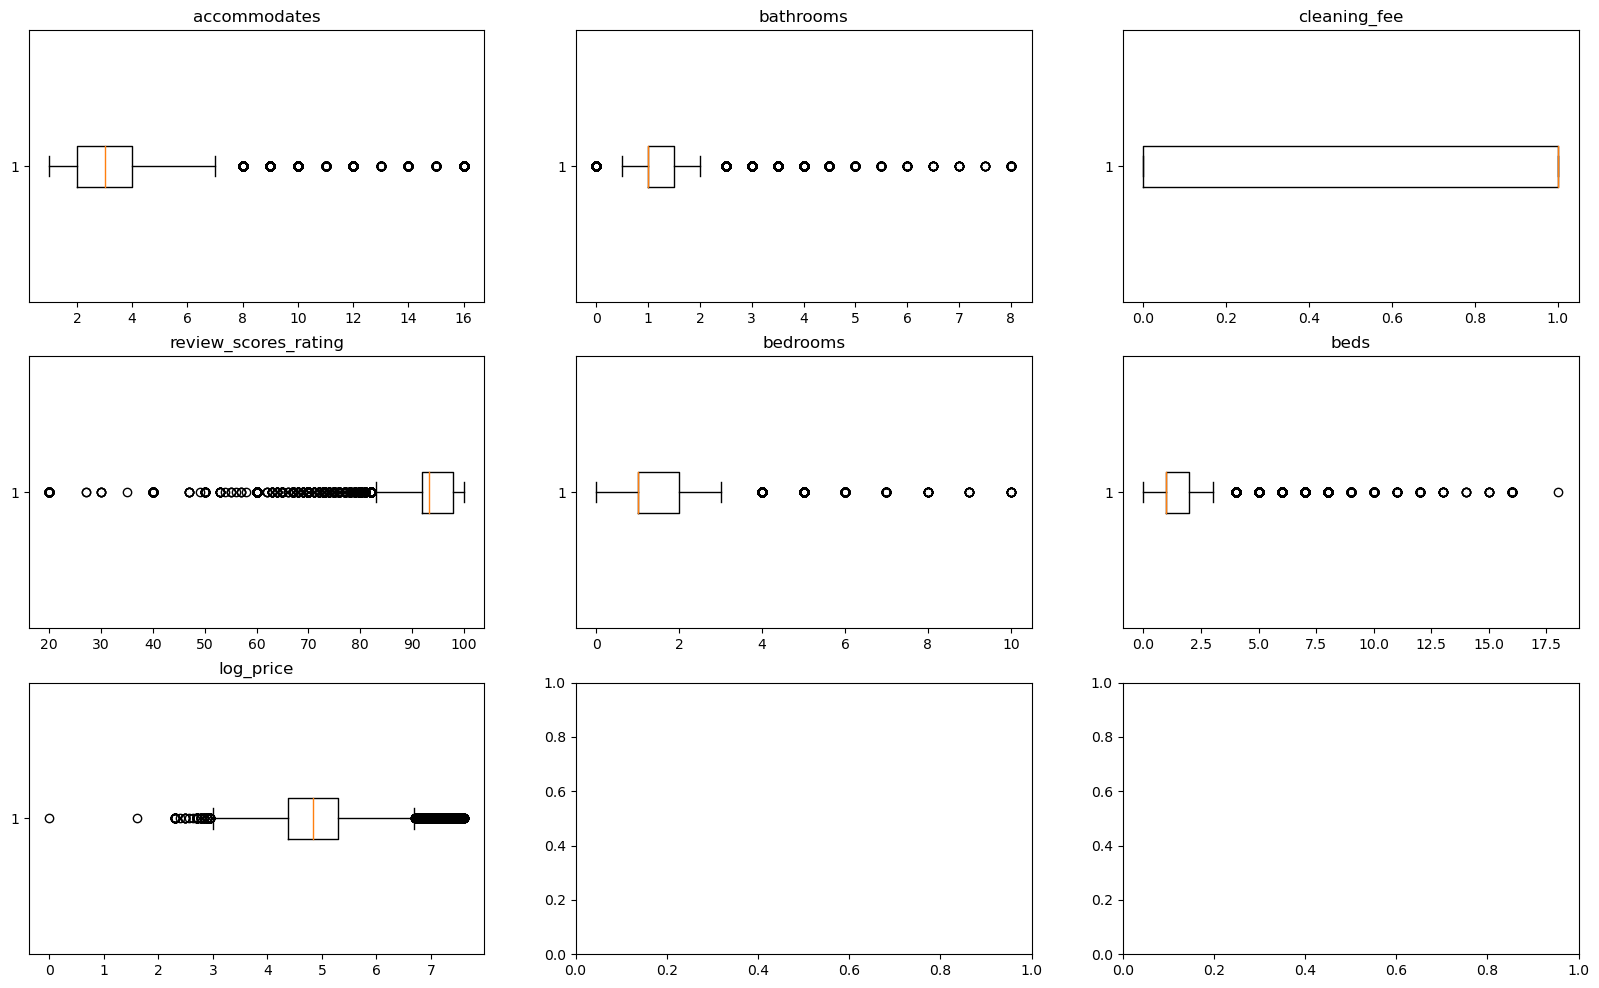

In [261]:
num = ['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price']

fig, ax = plt.subplots(3, 3, figsize = (20, 12))

for i, col in enumerate(num):
    r, c = divmod(i, 3)
    ax[r, c].boxplot(data = df_mean, x = col, vert = 0)
    ax[r, c].set_title(col)
plt.show()

In [262]:
def outlier_removal(col):
    
    sorted(col)
    
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)   
    
    return lower_range, upper_range

In [263]:
df_mean_out = df_mean.copy()
df_median_out = df_median.copy()
df_knn_out = df_knn.copy()

In [266]:
for col in df_mean_out.columns:
    
    lr, ur = outlier_removal(df_mean[col])
    
    df_mean_out[col] = np.where(df_mean_out[col] < lr, lr, df_mean_out[col])
    df_mean_out[col] = np.where(df_mean_out[col] > ur, ur, df_mean_out[col])
    
    

In [268]:
for col in df_median_out.columns:
    
    lr, ur = outlier_removal(df_median[col])
    
    df_median_out[col] = np.where(df_median_out[col] < lr, lr, df_median_out[col])
    df_median_out[col] = np.where(df_median_out[col] > ur, ur, df_median_out[col])
    
    

In [270]:
for col in df_knn_out.columns:
    
    lr, ur = outlier_removal(df_knn[col])
    
    df_knn_out[col] = np.where(df_knn_out[col] < lr, lr, df_knn_out[col])
    df_knn_out[col] = np.where(df_knn_out[col] > ur, ur, df_knn_out[col])
    
    

# Train_Test_Split

In [273]:
X = df_mean_out.drop('log_price', axis=1).copy()

# Copy target into the y dataframe. 
y = df_mean_out[['log_price']].copy()

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [275]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [276]:
regression_model.score(X_train, y_train)

0.5051049627764919

In [277]:
X = df_mean.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df_mean[['log_price']]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [279]:
regression_model.fit(X_train, y_train)


LinearRegression()

In [280]:
regression_model.score(X_train, y_train)

0.502716441089887

In [281]:
X = df_median.drop('log_price', axis=1).copy()

# Copy target into the y dataframe. 
y = df_median[['log_price']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5042421048332837

In [282]:
X = df_median_out.drop('log_price', axis=1).copy()

# Copy target into the y dataframe. 
y = df_median[['log_price']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.49905189651913084

In [283]:
X = df_knn_out.drop('log_price', axis=1).copy()

# Copy target into the y dataframe. 
y = df_median[['log_price']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5002985726700946

In [284]:
X = df_knn.drop('log_price', axis=1).copy()

# Copy target into the y dataframe. 
y = df_median[['log_price']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5051916015794157